<center>
    
### Global Population Analysis and Visualization (2024) - Data from Worldometers
    
</center>

#### Objectives

The objective of this project is to analyze and visualize global population data for 2024, with a specific focus on:

- Identifying countries with the highest and lowest population growth rates.
- Understanding the patterns of population increase and decrease across different regions.
- Analyzing the factors driving population growth in various countries and their potential implications.

This analysis aims to provide insights into global demographic trends and support informed decision-making for future planning.

In [78]:
# Import relevant packages
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

<center>
    
#### Web scraping

</center>

In [79]:
# URL with a table of global population by country
url = 'https://www.worldometers.info/world-population/population-by-country/'

# Send a GET request to fetch the raw HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [80]:
# Find the table that contains the data (in this case, the first table)
table = soup.find('table', {'class': 'table table-striped table-bordered'})

In [81]:
# Extract the headers from the table
headers = [header.text.strip() for header in table.find_all('th')]

In [82]:
# Extract the rows of the table
rows = []
for row in table.find_all('tr')[1:]:  # Skipping the header row
    cols = row.find_all('td')
    row_data = [col.text.strip() for col in cols]
    rows.append(row_data)

In [83]:
# Convert to a DataFrame
df = pd.DataFrame(rows, columns=headers)

<center>

#### Exploratory Analysis

</center>

In [110]:
# Retrieve the first 5 columns
df.head()

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,1419321278,-0.23,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,345426571,0.57,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,283487931,0.82,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,251269164,1.52,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %


In [109]:
# Retrieve the last 5 columns
df.tail()

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
229,230,Montserrat,4389,-0.70,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,Falkland Islands,3470,-0.20,-7,0,"12,170",-13,1.7,42,68 %,0.00 %
231,232,Tokelau,2506,4.55,109,251,10,72,2.6,27,0 %,0.00 %
232,233,Niue,1819,0.11,2,7,260,10,2.5,36,44 %,0.00 %
233,234,Holy See,496,0.00,0,"1,240",0,18,1.0,59,N.A.,0.00 %


In [85]:
# Inspect the DataFrame columns
print("DataFrame Columns: ", df.columns)

DataFrame Columns:  Index(['#', 'Country (or dependency)', 'Population (2024)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')


In [88]:
# Retrieve the info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        234 non-null    object
 1   Country (or dependency)  234 non-null    object
 2   Population (2024)        234 non-null    object
 3   Yearly Change            234 non-null    object
 4   Net Change               234 non-null    object
 5   Density (P/Km²)          234 non-null    object
 6   Land Area (Km²)          234 non-null    object
 7   Migrants (net)           234 non-null    object
 8   Fert. Rate               234 non-null    object
 9   Med. Age                 234 non-null    object
 10  Urban Pop %              234 non-null    object
 11  World Share              234 non-null    object
dtypes: object(12)
memory usage: 22.1+ KB
None


In [92]:
# Check for missing values
df.isna().sum()

#                          0
Country (or dependency)    0
Population (2024)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

- The dataset has no missing values.

In [90]:
# Check for a summary of statistics
df.describe()

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,234,234,234,234,234,234,234,234,234,234,234,234
unique,234,234,234,182,234,173,225,230,45,39,84,75
top,1,India,"1,450,935,791",0.00 %,"12,866,195",4,460,-7,1.5,18,N.A.,0.00 %
freq,1,1,1,4,1,8,3,3,24,13,18,57


In [111]:
df.shape

(234, 12)

#### Preliminary Exploration Findings

- Dataset Source: Worldometers (Global population data for 2024).
- The dataset has 234 rows and 12 columns
- No missing values are present in the dataset
- Most numerical columns, such as 'Population (2024)', 'Density (P/Km²)', and 'Yearly Change', are in string format, but they need to be converted to appropriate data types (e.g., integers or floats) for analysis.
- Categorical data, like Country (or dependency), is already in string format.

<center>

#### Data Cleaning

</center>

In [93]:
#Clean up the data (remove commas and convert population to integer)
df['Population (2024)'] = df['Population (2024)'].replace({',': ''}, regex=True).astype(int)

In [95]:
# Modify 'Yearly Change' column to float data type
df['Yearly Change'] = df['Yearly Change'].str.replace('%', '').astype(float)

<center>

#### Further Visualization

</center>

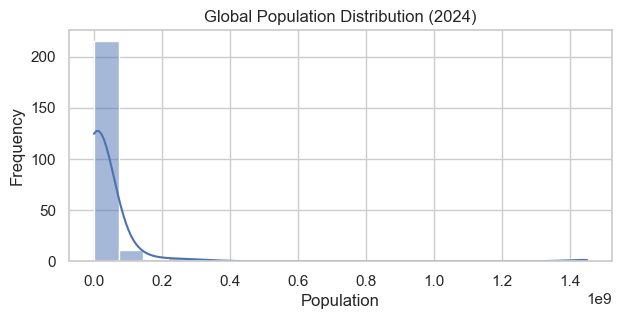

In [98]:
# Histogram of population distribution
plt.figure(figsize=(7,3))
sns.histplot(df['Population (2024)'], bins=20, kde=True)
plt.title('Global Population Distribution (2024)')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [102]:
# Top 10 most populous countries
top_10_population = df[['Country (or dependency)', 'Population (2024)']
                      ].sort_values('Population (2024)', ascending=False).head(10)

top_10_population


,Country (or dependency),Population (2024)
0,India,1450935791
1,China,1419321278
2,United States,345426571
3,Indonesia,283487931
4,Pakistan,251269164
5,Nigeria,232679478
6,Brazil,211998573
7,Bangladesh,173562364
8,Russia,144820423
9,Ethiopia,132059767


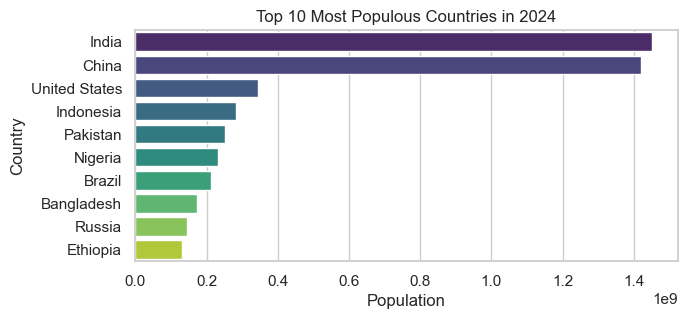

In [106]:
# Visualize the top 10 most populous countries
plt.figure(figsize=(7,3))
sns.barplot(x='Population (2024)', y='Country (or dependency)', data=top_10_population, palette='viridis')
plt.title('Top 10 Most Populous Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

In [114]:
# Find the countries with the highest yearly population growth
top_growth = df[['Country (or dependency)', 'Yearly Change']].sort_values('Yearly Change', ascending=False).head(10)

top_growth

,Country (or dependency),Yearly Change
64,Chad,5.07
122,Oman,4.60
56,Syria,4.57
231,Tokelau,4.55
80,South Sudan,4.01
85,United Arab Emirates,3.62
67,Somalia,3.54
121,Central African Republic,3.46
53,Niger,3.34
182,Mayotte,3.32


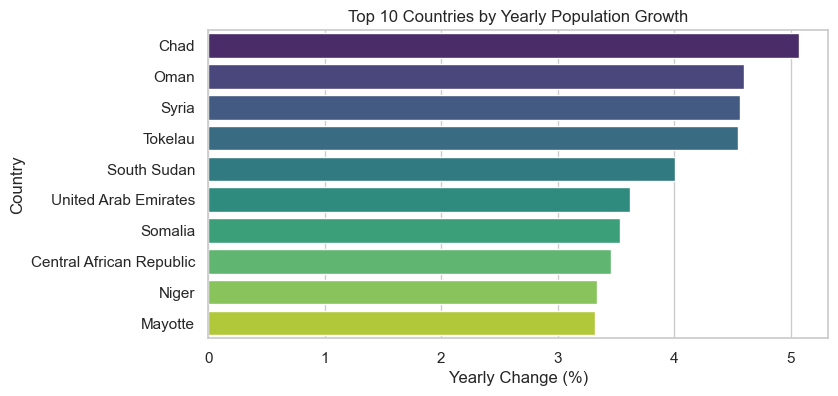

In [118]:
# Plotting the top growth countries
plt.figure(figsize=(8, 4))
sns.barplot(x='Yearly Change', y='Country (or dependency)', data=top_growth, palette='viridis')
plt.title('Top 10 Countries by Yearly Population Growth')
plt.xlabel('Yearly Change (%)')
plt.ylabel('Country')
plt.show()

In [116]:
# Find the countries with the highest and lowest yearly population growth
bottom_growth = df[['Country (or dependency)', 'Yearly Change']].sort_values('Yearly Change').head(10)

bottom_growth

,Country (or dependency),Yearly Change
219,Saint Martin,-5.04
222,Cook Islands,-3.47
216,Marshall Islands,-3.29
210,Northern Mariana Islands,-1.92
94,Greece,-1.90
226,Tuvalu,-1.73
208,American Samoa,-1.59
137,Moldova,-1.05
228,Saint Helena,-0.98
199,U.S. Virgin Islands,-0.93


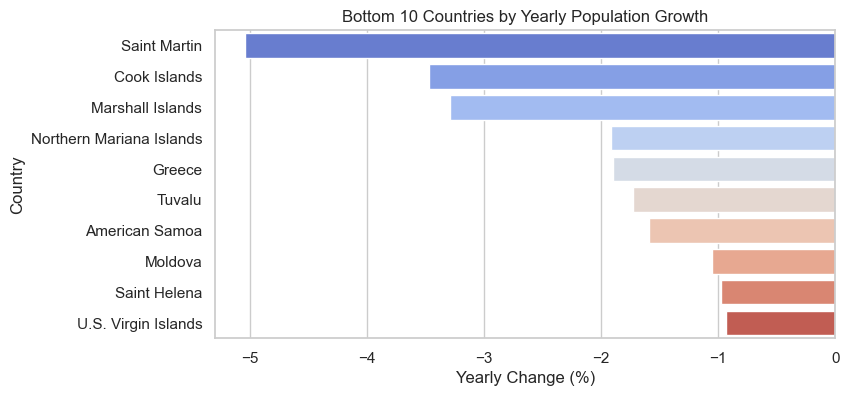

In [120]:
# Plotting the bottom growth countries
plt.figure(figsize=(8, 4))
sns.barplot(x='Yearly Change', y='Country (or dependency)', data=bottom_growth, palette='coolwarm')
plt.title('Bottom 10 Countries by Yearly Population Growth')
plt.xlabel('Yearly Change (%)')
plt.ylabel('Country')
plt.show()

###  Insights:
1. **Global Population Distribution**:
   - The histogram of the global population distribution in 2024 highlights that most countries have a relatively smaller population compared to the top 10 most populous nations.
   - A few countries dominate the global population figures, while many others contribute to a much smaller fraction of the total global population.

2. **Top 10 Most Populous Countries**:
   - The analysis reveals that **China** and **India** continue to be the most populous countries, with populations exceeding 1.4 billion each. These two countries account for a significant portion of the global population.
   - Other populous countries include the **United States**, **Indonesia**, and **Pakistan**, which all have populations exceeding 200 million.
   - There is a noticeable gap in population size between the top few countries and the rest, with many countries having populations in the tens of millions.

3. **Population Growth**:
   - The **Yearly Change** percentage provides insights into the growth rate of populations across different countries. Countries with high growth rates, like **Nigeria** and **Egypt**, are expected to experience significant increases in population over the next decade, which will impact resource management, infrastructure, and policy planning.


### Conclusion:
This analysis underscores the continued population growth in the most populous countries, while also highlighting the differences in population size and distribution across the globe. Understanding these trends is essential for policymakers and organizations to plan for future challenges in areas like healthcare, education, urbanization, and resource distribution.

### Recommendations for Future Work:
- **Further Analysis of Growth Trends**: Examine the factors driving population growth in countries with high yearly changes, and identify potential challenges they may face in the coming years.
- **Impact of Urbanization**: Study the relationship between population density and urbanization, and how this affects infrastructure, transportation, and social services.
- **Demographic Transitions**: Analyze the aging population in countries with low birth rates, such as Japan and many European nations, and its potential economic implications.